In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [6]:
# read in h5 output
Lx, Lt = 16, 48

# jobid = 19910
jobid = 20401
k_list, mom_list = [], []
Z, Zq, σ, σZq = [], [], [], []
for mu in range(4):
    out_file = './analysis_output/job' + str(jobid) + '/O' + str(mu + 1) + str(mu + 1) + '.h5'
    ks, ms, Zboot, Zqboot, cfgnum = analysis.load_data_h5(out_file)
    k_list.append(ks)
    mom_list.append(ms)
    Z.append(np.mean(Zboot, axis = 1))
    σ.append(np.std(Zboot, axis = 1))
    Zq.append(np.mean(Zqboot, axis = 1))
    σZq.append(np.std(Zqboot, axis = 1))

Loading ./analysis_output/job20401/O11.h5.
Loading ./analysis_output/job20401/O22.h5.
Loading ./analysis_output/job20401/O33.h5.
Loading ./analysis_output/job20401/O44.h5.


TODO: Can only convert operators in hypercubic irreps to MS bar! Not individual operators

<IPython.core.display.Javascript object>


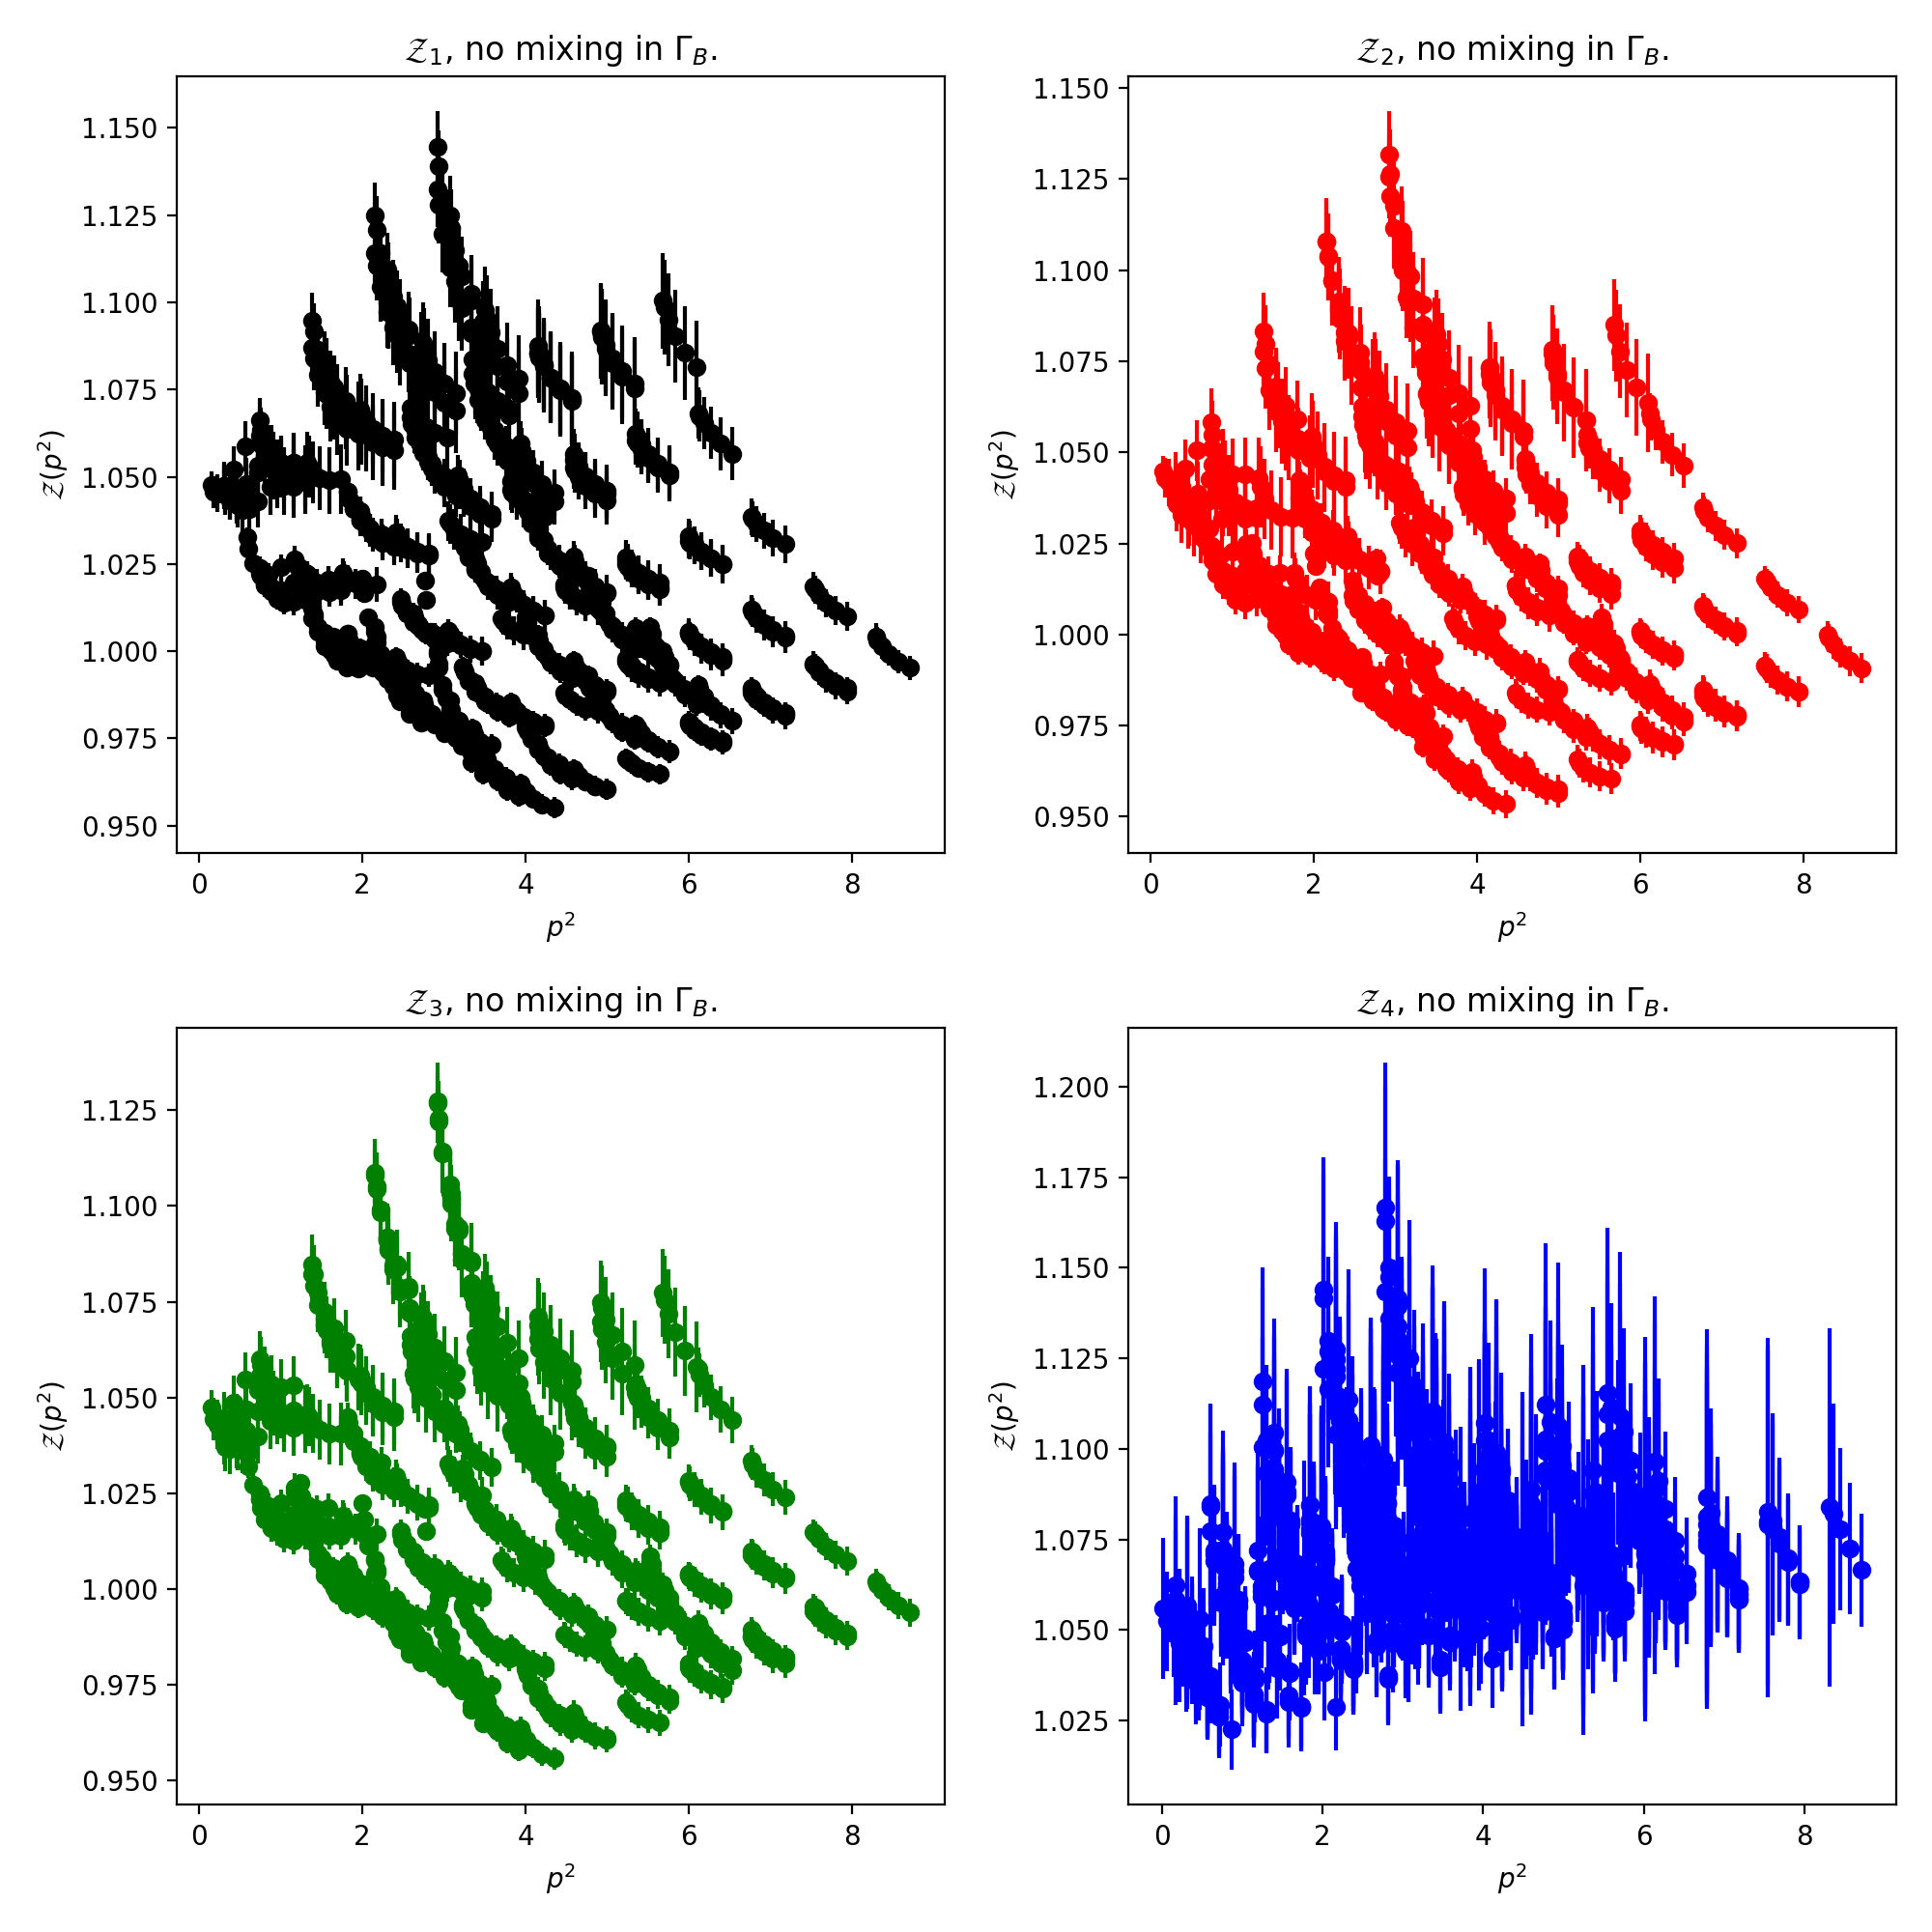

In [7]:
# size = (10, 5)
size = (10, 10)
f, ax = plt.subplots(2, 2, figsize = size)
# f, ax = plt.subplots(4, 2, figsize = (8, 20))
p_squared = [np.array([np.abs(analysis.square(p)) for p in mom_list_i]) for mom_list_i in mom_list]
colors = ['k', 'r', 'g', 'b']

for mu in range(4):
    ax[mu // 2][mu % 2].errorbar(p_squared[mu], np.real(Z[mu]), yerr = np.abs(σ[mu]), fmt = 'o', c = colors[mu], label = 'RI-MOM')
    ax[mu // 2][mu % 2].set_title('$\mathcal{Z}_' + str(mu + 1) + '$, no mixing in $\Gamma_B$.')
    ax[mu // 2][mu % 2].set_xlabel('$p^2$')
    ax[mu // 2][mu % 2].set_ylabel('$\mathcal{Z}(p^2)$')
#     ax[mu // 2][mu % 2].legend()
plt.tight_layout()
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/19910/renorm_coeffs.pdf')

In [8]:
wall_src_file = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq19214/Zq.h5'
wk, wp, wZq = analysis.load_Zq(wall_src_file)
psquared_Zq = np.array([analysis.square(p) for p in wp])
Zq_wall = np.mean(wZq, axis = 1)
σZq_wall = np.std(wZq, axis = 1)

<IPython.core.display.Javascript object>


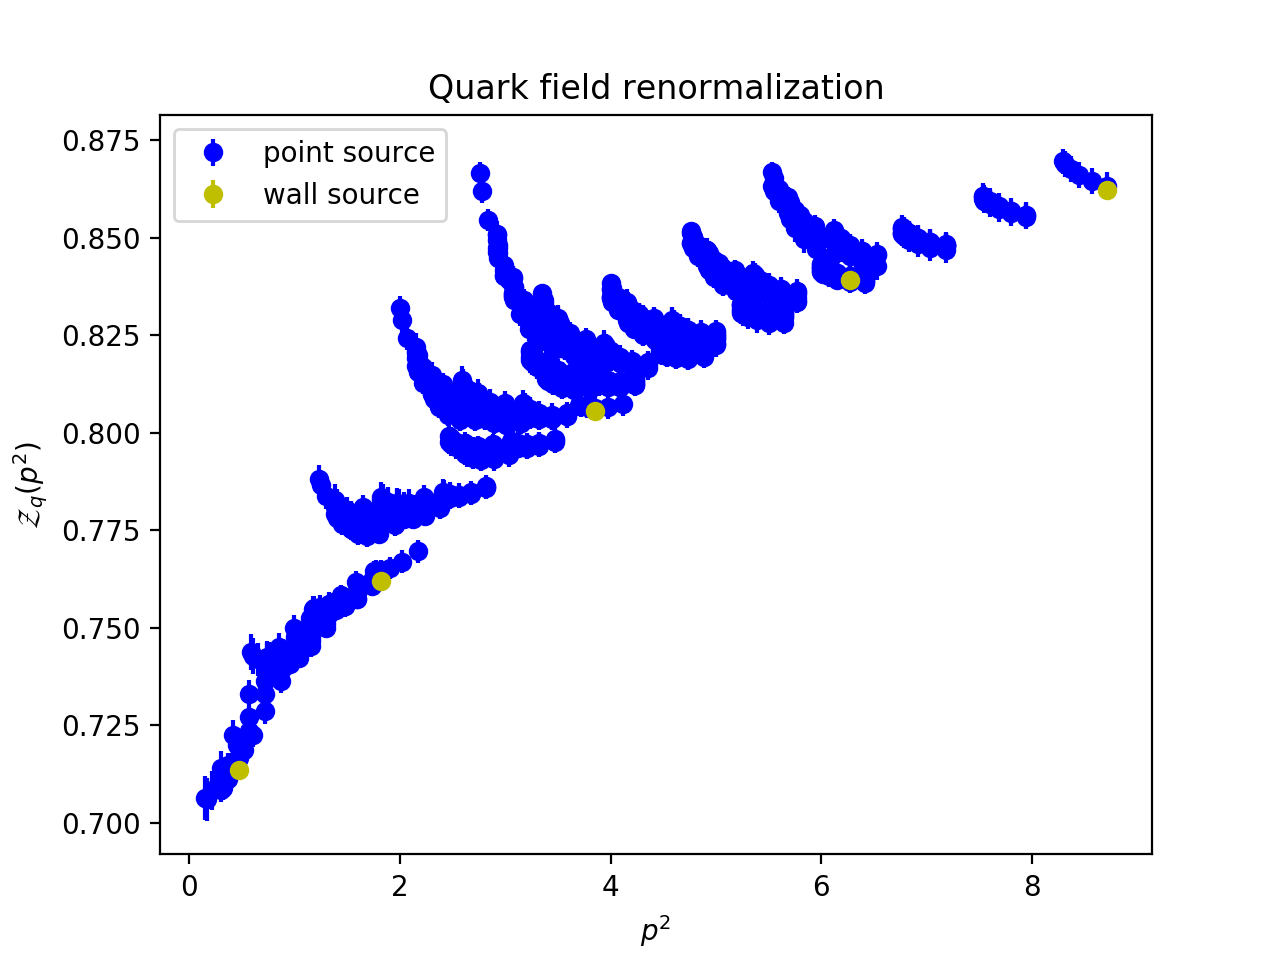

In [9]:
plt.figure()
plt.errorbar(p_squared[2], np.real(Zq[2]), yerr = np.real(σZq[0]), fmt = 'o', c = 'b', label = 'point source')
plt.ylabel('$\mathcal{Z}_q(p^2)$')
plt.xlabel('$p^2$')
plt.title('Quark field renormalization')

plt.errorbar(psquared_Zq, np.real(Zq_wall), yerr = np.real(σZq_wall), fmt = 'o', c = 'y', label = 'wall source')
plt.legend()
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/19910/quark_renorm.pdf')

In [ ]:
plt.figure()
Zqtest = [0] * 4
σZqtest = [0] * 4
for i, N in enumerate([1, 5, 10, 20]):
    filename = '/Users/theoares/lqcd/npr_momfrac/analysis_output/jobZq17999/N' + str(N) + '.h5'
    Zqq = analysis.load_data_h5(out_file)[3]
    Zqtest[i] = np.mean(Zqq, axis = 1)
    σZqtest[i] = np.std(Zqq, axis = 1)
    plt.scatter(p_squared, -np.real(Zqtest[i]), label = str(N))
plt.legend()
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/19045/wall_vs_point.pdf')

In [ ]:
# psub = subset of sink momenta to graph
# props_sub = subset of propagators to use (number of graphs to show)
# label = if True, will label each point with its momenta
# def graph_subset(ksub, psub, props_sub, ms = True, label = False):
def graph_subset(indices, ms = True, label = False):
    f, ax = plt.subplots()
    p_squared_sub = p_squared[indices]
    if ms:
        Zsub = Z_MSbar_avg[indices]
    else:
        Zsub = Z_avg[indices]
    σsub = σ[indices]
    ax.errorbar(p_squared_sub, np.real(Zsub), yerr = np.abs(σsub), fmt = 'o')
    if label:
        for i, ii in enumerate(indices):
            ax.annotate(k_list[ii], (p_squared_sub[i], np.real(Zsub[i])))
    ax.set_xlabel('$p^2$')
    ax.set_ylabel('$\mathcal{Z}(p^2)$')
    ax.set_title('Subset of momenta')
    plt.tight_layout()
    plt.show()
def graph_subset_error(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx, mom in enumerate(props_sub):
        rsquaredsub = [analysis.square(np.array(p) - np.array(mom)) for p in psub]
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].scatter(rsquaredsub, σsub)
        if label:
            for i, r in enumerate(rsquaredsub):
                ax[idx].annotate(psub[i], (r, σsub[i]))
        ax[idx].set_xlabel('$|p - p_{prop}|^2$')
        ax[idx].set_ylabel('Error')
        ax[idx].set_title('Prop momentum = ' + str(prop_list[idx]))
    plt.tight_layout()
    plt.show()

In [ ]:
# np.savetxt('/Users/theoares/lqcd/npr_momfrac/analysis_output/psub_2_17999.txt', psub, delimiter = ',')

In [ ]:
# condition = lambda k : k[0] == k[1] and k[1] == k[2]
condition = lambda k : k[3] == 1 and k[1] < 2 and k[2] < 2 and k[0] < 2
indices = [i for (i, k) in enumerate(k_list) if condition(k)]
graph_subset(indices, ms = True, label = True)

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/17999/20_avg_pt_srcs_diag.pdf')

## Fit data

In [ ]:
from scipy.optimize import curve_fit
from analysis import square

# adjust f to adjust curve fit functions. Assumes x is ptwid
# def f(x, Z_cont, c1, c2, c3, c4, c5):
#     return Z_cont + c1 * (x[2] - x[3]) + c2 * square(x) + c3 * np.sum(x ** 4) / square(x) \
#         + c4 * square(x) * np.log(square(x)) + c5 / square(x)
def f(x, Z_cont, c1, c2):
    return Z_cont + c1 * (np.sum(x ** 4) / square(x)) + c2 * np.sum(x ** 4)

def tildep(p):
    Lx, Lt = 16, 48
    L = [Lx, Lx, Lx, Lt]
    return np.array([np.sin(2 * np.pi * p[i] / L[i]) for i in range(4)])
def fourth(p):
    return np.sum(p ** 4)
# def Z_lat(mom_list, Z_cont, c1, c2, c3, c4, c5):
#     results = []
#     for p in mom_list:
#         ptwid = tildep(p)
#         results.append( f(ptwid, Z_cont, c1, c2, c3, c4, c5) )
#     return np.array(results)
def Z_lat(mom_list, Z_cont, c1, c2):
    results = []
    for p in mom_list:
        ptwid = tildep(p)
        results.append( f(ptwid, Z_cont, c1, c2) )
    return np.array(results)

In [ ]:
C, cov = curve_fit(Z_lat, mom_list, np.real(Z_MSbar_avg), sigma = np.real(σ))
print('Continuum Renormalization coefficient: ' + str(C[0]))
print('Fit parameters c_i: ' + str(C[1:]))

In [ ]:
fig, ax = plt.subplots()
# ax.scatter([square(p) for p in mom_list], [f(tildep(p), C[0], C[1], C[2], C[3], C[4], C[5]) for p in mom_list], c = 'k', label = 'fitted')
ax.scatter([square(p) for p in mom_list], [f(tildep(p), C[0], C[1], C[2]) for p in mom_list], c = 'k', label = 'fitted')
ax.scatter([square(p) for p in mom_list], Z_MSbar_avg, c = 'r', label = 'raw data')
ax.legend()
ax.set_title('$\mathcal{Z}$ in $\overline{MS}$')
ax.set_xlabel('$\mu^2$')
ax.set_ylabel('$\mathcal{Z}$')
plt.show()

In [ ]:
# Subtract artifacts off